In [44]:
import cv2
import os 

import numpy as np 
import matplotlib.pyplot as plt

DATASET KITA --> FOLDER IMAGES

Object 1 & 2 untuk Matching

In [45]:
data_path = './PoVeKamon/Images/Data/'
obj1_path = './PoVeKamon/Images/Object.png'
obj2_path = './PoVeKamon/Images/Object2.png'

print(os.path.exists(data_path))
print(os.path.exists(obj1_path))
print(os.path.exists(obj2_path))

True
True
True


In [46]:
def load_preprocess(path):
    img = cv2.imread(path)
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.equalizeHist(img_gray)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), img_gray

In [47]:
# load image target 1 dan 2
obj1, obj1_gray = load_preprocess(obj1_path)
obj1_gray = cv2.medianBlur(obj1_gray, 5) # median blur

obj2, obj2_gray = load_preprocess(obj2_path)
obj2_gray = cv2.GaussianBlur(obj2_gray, (3, 3), 0) # gaussian blur

In [48]:
# feature detection -- ada 3: akaze, sift, orb
akaze = cv2.AKAZE.create()
obj1_kp, obj1_desc = akaze.detectAndCompute(obj1_gray, None)
obj2_kp, obj2_desc = akaze.detectAndCompute(obj2_gray, None)

In [49]:
# feature matching
def feature_matching(desc, target_desc): 
    flann = cv2.FlannBasedMatcher(dict(algorithm=1), dict(checks=50))
    matches = flann.knnMatch(np.float32(target_desc), desc, k=2)
    matches_mask = [[0, 0] for _ in range(len(matches))]
    
    curr_match = 0
    
    for i, (fm, sm) in enumerate(matches):
        #lowe ratio test
        if fm.distance < 0.7*sm.distance:
            curr_match += 1
            matches_mask[i] = [1, 0]
            
    return matches, matches_mask, curr_match

## AKAZE

In [50]:
# listing image + load image data - akaze
best1 = 0
best2 = 0
for file in os.listdir(data_path): 
    img, img_gray = load_preprocess(data_path + file)
    
    img1_gray = cv2.medianBlur(img_gray, 5)
    img2_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    
    img1_kp, img1_desc = akaze.detectAndCompute(img1_gray, None)
    img2_kp, img2_desc = akaze.detectAndCompute(img2_gray, None)
    
    img1_desc = np.float32(img1_desc)
    img2_desc = np.float32(img2_desc)
    
    matches1, matches_mask1, curr_match1 = feature_matching(img1_desc, obj1_desc)
    matches2, matches_mask2, curr_match2 = feature_matching(img2_desc, obj2_desc)
    
    if curr_match1 > best1: 
        best1 = curr_match1
        best_data1 = {
            "img": img, 
            "keypoint": img1_kp,
            "matches" : matches1, 
            "mask" : matches_mask1 
        }
        
    if curr_match2 > best2: 
        best2 = curr_match2
        best_data2 = {
            "img": img, 
            "keypoint": img2_kp,
            "matches" : matches2, 
            "mask" : matches_mask2 
        }
    
# test
print("success")

success


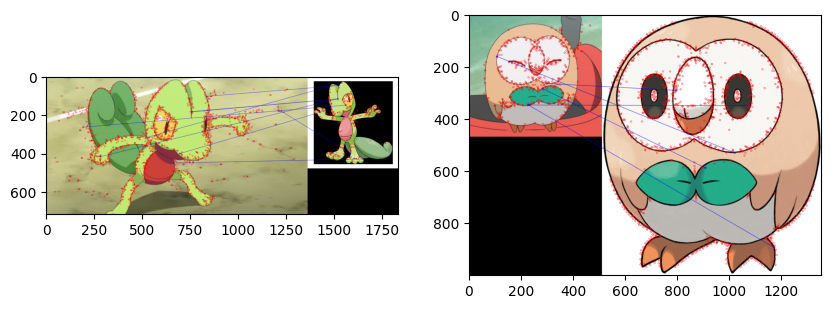

In [51]:
# visualisasi match - akaze
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
result = cv2.drawMatchesKnn(
    obj1, obj1_kp, 
    best_data1["img"], best_data1["keypoint"],
    best_data1["matches"], None,
    matchColor = (0,0,255), singlePointColor=(255,0,0), 
    matchesMask = best_data1["mask"]
    )
plt.imshow(result)

plt.subplot(1, 2, 2)
result = cv2.drawMatchesKnn(
    obj2, obj2_kp, 
    best_data2["img"], best_data2["keypoint"],
    best_data2["matches"], None,
    matchColor = (0,0,255), singlePointColor=(255,0,0), 
    matchesMask = best_data2["mask"]
    )
plt.imshow(result)

## SIFT

In [52]:
sift = cv2.SIFT.create()
obj1_kp, obj1_desc = sift.detectAndCompute(obj1_gray, None)
obj2_kp, obj2_desc = sift.detectAndCompute(obj2_gray, None)

In [53]:
# listing image + load image data  sift
best1 = 0
best2 = 0
for file in os.listdir(data_path): 
    img, img_gray = load_preprocess(data_path + file)
    
    img1_gray = cv2.medianBlur(img_gray, 5)
    img2_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    
    img1_kp, img1_desc = sift.detectAndCompute(img1_gray, None)
    img2_kp, img2_desc = sift.detectAndCompute(img2_gray, None)
    
    img1_desc = np.float32(img1_desc)
    img2_desc = np.float32(img2_desc)
    
    matches1, matches_mask1, curr_match1 = feature_matching(img1_desc, obj1_desc)
    matches2, matches_mask2, curr_match2 = feature_matching(img2_desc, obj2_desc)
    
    if curr_match1 > best1: 
        best1 = curr_match1
        best_data1 = {
            "img": img, 
            "keypoint": img1_kp,
            "matches" : matches1, 
            "mask" : matches_mask1 
        }
        
    if curr_match2 > best2: 
        best2 = curr_match2
        best_data2 = {
            "img": img, 
            "keypoint": img2_kp,
            "matches" : matches2, 
            "mask" : matches_mask2 
        }
    
# test
print("success")

success


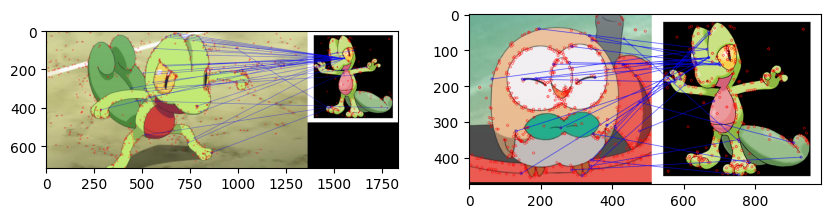

In [54]:
# visualisasi match - sift
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
result = cv2.drawMatchesKnn(
    obj1, obj1_kp, 
    best_data1["img"], best_data1["keypoint"],
    best_data1["matches"], None,
    matchColor = (0,0,255), singlePointColor=(255,0,0), 
    matchesMask = best_data1["mask"]
    )
plt.imshow(result)

plt.subplot(1, 2, 2)
result = cv2.drawMatchesKnn(
    obj2, obj2_kp, 
    best_data2["img"], best_data2["keypoint"],
    best_data2["matches"], None,
    matchColor = (0,0,255), singlePointColor=(255,0,0), 
    matchesMask = best_data2["mask"]
    )
plt.imshow(result)

## ORB

In [55]:
orb = cv2.ORB.create()
obj1_kp, obj1_desc = orb.detectAndCompute(obj1_gray, None)
obj2_kp, obj2_desc = orb.detectAndCompute(obj2_gray, None)

In [56]:
# listing image + load image data - orb
best1 = 0
best2 = 0
for file in os.listdir(data_path): 
    img, img_gray = load_preprocess(data_path + file)
    
    img1_gray = cv2.medianBlur(img_gray, 5)
    img2_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    
    img1_kp, img1_desc = orb.detectAndCompute(img1_gray, None)
    img2_kp, img2_desc = orb.detectAndCompute(img2_gray, None)
    
    img1_desc = np.float32(img1_desc)
    img2_desc = np.float32(img2_desc)
    
    matches1, matches_mask1, curr_match1 = feature_matching(img1_desc, obj1_desc)
    matches2, matches_mask2, curr_match2 = feature_matching(img2_desc, obj2_desc)
    
    if curr_match1 > best1: 
        best1 = curr_match1
        best_data1 = {
            "img": img, 
            "keypoint": img1_kp,
            "matches" : matches1, 
            "mask" : matches_mask1 
        }
        
    if curr_match2 > best2: 
        best2 = curr_match2
        best_data2 = {
            "img": img, 
            "keypoint": img2_kp,
            "matches" : matches2, 
            "mask" : matches_mask2 
        }
    
# test
print("success")

success


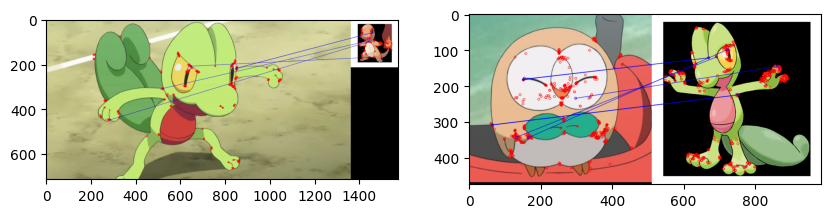

In [57]:
# visualisasi match - orb
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
result = cv2.drawMatchesKnn(
    obj1, obj1_kp, 
    best_data1["img"], best_data1["keypoint"],
    best_data1["matches"], None,
    matchColor = (0,0,255), singlePointColor=(255,0,0), 
    matchesMask = best_data1["mask"]
    )
plt.imshow(result)

plt.subplot(1, 2, 2)
result = cv2.drawMatchesKnn(
    obj2, obj2_kp, 
    best_data2["img"], best_data2["keypoint"],
    best_data2["matches"], None,
    matchColor = (0,0,255), singlePointColor=(255,0,0), 
    matchesMask = best_data2["mask"]
    )
plt.imshow(result)